<a href="https://colab.research.google.com/github/Goal48/Customer_Churm_Prediction_Deep_Learning/blob/main/Customer_churm_Prediction_Pius_Dutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rjmanoj_credit_card_customer_churn_prediction_path = kagglehub.dataset_download('rjmanoj/credit-card-customer-churn-prediction')

print('Data source import complete.')


Using Colab cache for faster access to the 'credit-card-customer-churn-prediction' dataset.
Data source import complete.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [9]:
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


In [12]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [13]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [14]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],axis = 1).head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df, columns=['Gender','Geography'], drop_first=True)


In [16]:
print(df.columns)


Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'Gender_Male', 'Geography_Germany',
       'Geography_Spain'],
      dtype='object')


In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [18]:
cols = ['Gender', 'Geography']

existing = [col for col in cols if col in df.columns]

if existing:
    df = pd.get_dummies(df, columns=existing, drop_first=True)
else:
    print("Columns already encoded or not present")


Columns already encoded or not present


In [27]:
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])
y = df['Exited']

In [28]:
print(y)

2       1
3       0
4       0
5       1
6       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9998, dtype: int64


In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.2,random_state = 1)

In [30]:
pd.DataFrame(X_train).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
9665,547,30,6,0.00,2,1,1,18471.86,True,False,False
2938,730,27,5,0.00,2,1,1,116081.93,True,False,False
8716,565,38,5,0.00,2,0,1,80630.32,True,False,False
9686,793,63,4,103729.79,2,1,1,80272.06,True,False,False
724,694,36,3,97530.25,1,1,1,117140.41,True,False,False


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [46]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
train_data = model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8710 - loss: 0.3064 - val_accuracy: 0.8725 - val_loss: 0.3052
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8776 - loss: 0.2825 - val_accuracy: 0.8725 - val_loss: 0.3102
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8689 - loss: 0.2969 - val_accuracy: 0.8725 - val_loss: 0.3098
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8631 - loss: 0.3117 - val_accuracy: 0.8700 - val_loss: 0.3123
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8863 - loss: 0.2789 - val_accuracy: 0.8675 - val_loss: 0.3148
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8731 - loss: 0.2771 - val_accuracy: 0.8700 - val_loss: 0.3162
Epoch 7/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8745 - loss: 0.2859 - val_accuracy: 0.8625 - val_loss: 0.3177
Epoch 8/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8847 - loss: 0.2821 - val_accuracy: 0.8675 - 

In [51]:
model.layers[0].get_weights()

[array([[ 0.80061144, -0.00674949,  0.22014183,  0.12016606,  0.4640685 ,
         -0.7589413 , -0.02217859,  0.18538874, -0.4004943 , -0.39621085,
          0.00711334],
        [ 0.37235746, -0.06681341, -1.3340625 , -0.88389   ,  0.6534628 ,
          0.30407295, -0.4913128 , -0.8556104 ,  0.7531578 , -0.0073368 ,
          0.15750794],
        [-0.6116164 ,  0.08102983, -0.527757  , -0.5404102 , -0.03747026,
         -0.33199197,  0.07949284,  0.02175327, -0.7717208 ,  0.7869809 ,
         -0.45001554],
        [ 0.3099252 , -0.12114513, -0.15132408, -0.98270124,  0.03338364,
         -0.04673309, -0.5920673 ,  0.2765156 , -0.42100057,  0.42749476,
         -0.06098132],
        [-0.36017582, -0.9678283 , -0.01405161,  0.26538992,  0.2314724 ,
          0.27443624,  0.10070263,  0.18870108, -0.88330823,  0.1936921 ,
          1.2742401 ],
        [-0.01709767, -0.09925319, -0.23132297,  0.04448013,  0.16359772,
         -0.55483574, -0.59682673,  0.00859402, -0.15232998,  0.2678552

In [52]:
model.layers[1].get_weights()

[array([[-0.5533749 ,  0.52958524, -0.640225  ,  0.43433037, -0.00960173,
          0.3916926 ,  0.5048658 ,  0.2398062 ,  0.16387229, -0.6169197 ,
          0.01207729],
        [ 0.18929136,  0.02293383, -0.6420723 ,  0.5542719 , -0.2570071 ,
         -0.3160462 , -1.1245031 , -0.30974913,  0.48510754,  0.5661799 ,
         -0.16022956],
        [ 0.9040041 ,  0.03240558, -0.24302483, -0.09803129, -0.37369633,
         -0.93792003,  0.4931952 ,  0.5461005 , -0.6088068 ,  0.37573862,
         -0.01309479],
        [ 0.16388376,  0.655029  , -1.7121379 , -0.19219337, -0.47521564,
         -0.62880486, -0.3519593 ,  0.20545287,  0.18075423,  0.14818461,
          0.5018552 ],
        [-0.50309175,  0.32954833, -0.17588817,  0.2343458 ,  0.45313752,
         -0.469958  ,  0.25466326,  0.79961675, -0.30145046, -0.70702124,
          0.93782383],
        [-1.1810205 ,  0.6545573 , -0.12556502, -0.40080902, -0.39518434,
         -0.30037823,  0.5230747 ,  0.40169087,  0.37213552,  0.2195851

In [53]:
y_log = model.predict(X_test)
y_log

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.9822212 ],
       [0.4421835 ],
       [0.9989684 ],
       ...,
       [0.7113295 ],
       [0.7154605 ],
       [0.02647407]], dtype=float32)

In [54]:
y_pred = np.where(y_log > 0.5,1,0)
y_pred

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]])

In [55]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.833729216152019

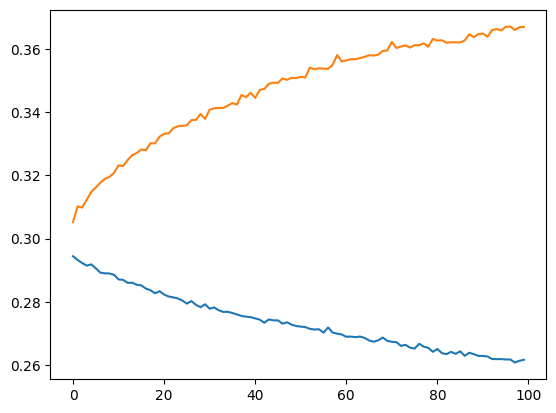

In [57]:
import matplotlib.pyplot as plt
plt.plot(train_data.history['loss'])
plt.plot(train_data.history['val_loss'])


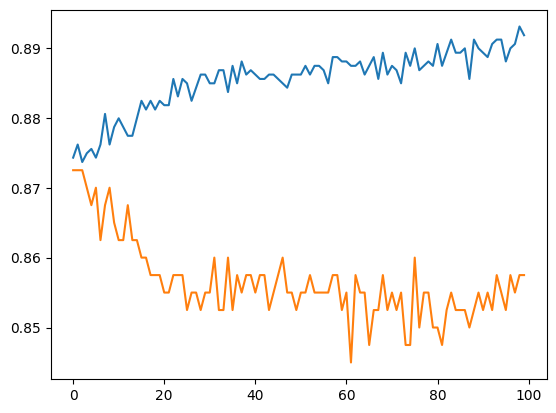

In [58]:
import matplotlib.pyplot as plt
plt.plot(train_data.history['accuracy'])
plt.plot(train_data.history['val_accuracy'])